In [88]:
import Pkg
import GLMakie
import FFTW
using LaTeXStrings

# The Fourier Transform  $\mathscr{F}$

## Reminders 

if $f$ is a function on $\mathbb{R}$ that satisfies appropriate regularity and decay conditions, then its Fourier transform $\mathscr{F}$ is defined by:

$$\large\hat{f}(\xi)=\int_{-\infty}^{+\infty}f(x)e^{-2\pi ix\xi}\,dx\quad \xi\in\mathbb{R}$$

and its counter part, the Fourier inverse formula, holds:

$$\large f(x)=\int_{-\infty}^{+\infty}\hat{f}(\xi)e^{2\pi ix\xi}\,d\xi\quad x\in\mathbb{R}$$

If there be a holomorphic extension of $f$ to $\mathbb{C}$, in a bounded interval $[-M,M]$ that satisfies the growth condition:

$$\large|f(z)|\le Ae^{2\pi M|z|}\quad \exists A>0$$
#### Moderate decrease

function $f$ is of **moderate decrease** if $f$ is continous and $\exists A >0$ so that $|f(x)| \le \dfrac{A}{1+x^{2}}\quad \forall x\in\mathbb{R}$. A more restrictive condition is that $f\in\mathbf{S}$ where $\mathbf{S}$ is the **Shwart sphere** of testing functions


## The class  $\Im$

For each a>0 we denote by $\Im_{a}$ the class of all functions f that satisfies the following two conditions:

1) The function $f$ is holomorphic in the horizontal strip
$$S_{a}=\left\{z\in\mathbb{C}\,:\,|Im(z)| < a\right\}$$
2) There exists a constant $A>0$ such that
$$|f(x+iy)|\le\dfrac{A}{1+x^{2}}\quad \forall x\in\mathbb{R},\quad |y|<a$$

$\Im_{a}$ consists of those holomorphic functions on $\mathbf{S}_{a}$ that are of **moderate decay** on each horizontal line $Im(z)=y$,uniformely in $-a<y<a$


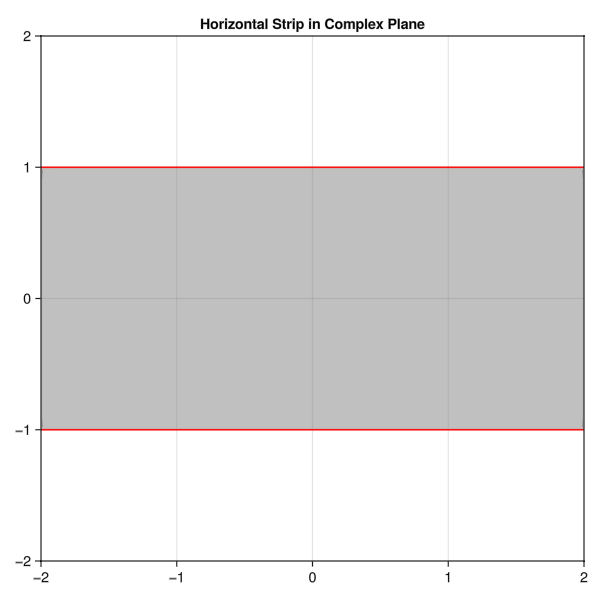

In [89]:
begin
    fig = GLMakie.Figure(size = (600, 600))
    ax = Axis(fig[1, 1], limits = (-2, 2, -2, 2), title = "Horizontal Strip in Complex Plane")
a = -1
b = 1
    
    polygon_vertices = GLMakie.Point2f0.([
        (-2, a), (2, a), (2, b), (-2, b)
    ])

    # Draw the horizontal strip as a polygon
    GLMakie.poly!(ax, polygon_vertices, color = (:grey, 0.5))

    # Draw the boundaries
    GLMakie.lines!(ax, [-2, 2], [a, a], color = :red)
    GLMakie.lines!(ax, [-2, 2], [b, b], color = :red)

    fig
end

**If $f\in\Im_{a}$, then for every $n$, the $n^{th}$ derivative of $f$ belongs to $\Im_{b}\,\,\forall\,\,0<b<a$**


Examples:
$$\large f(z)=e^{-\pi z^{2}}\quad \forall a\in \Im_{a}$$

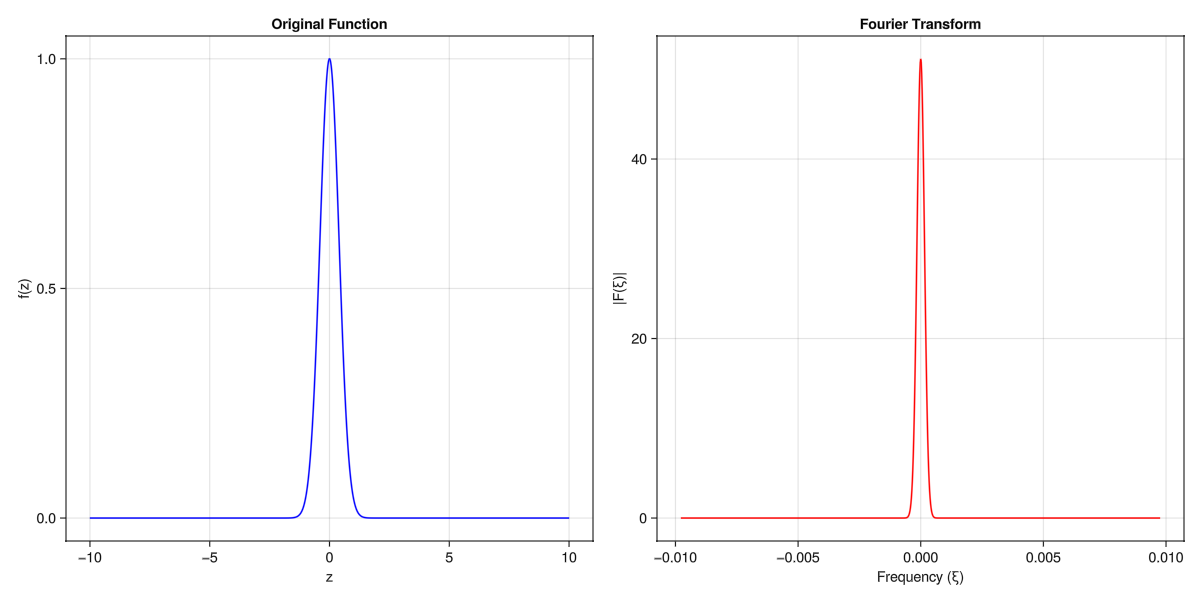

In [90]:
begin
using GLMakie
using FFTW
function f(z)
    return exp(-π * z^2)
end

# Define the range for z and the sample points
z = LinRange(-10, 10, 1024)
f_values = f.(z)

# Compute the Fourier transform using FFT
F_transform = fftshift(fft(f_values))

# Frequency range for the Fourier transform
dz = z[2] - z[1]
N = length(z)
freq = fftshift(fftfreq(N, dz))

# Convert data to Point2f type for plotting
original_function_points = Point2f.(collect(z), collect(f_values))
fourier_transform_points = Point2f.(collect(freq), collect(abs.(F_transform)))

# Plot the original function and its Fourier transform using GLMakie
fig = Figure(size = (1200, 600))

ax1 = Axis(fig[1, 1], title = "Original Function", xlabel = "z", ylabel = "f(z)")
lines!(ax1, collect(z), collect(f_values), color = :blue)

ax2 = Axis(fig[1, 2], title = "Fourier Transform", xlabel = "Frequency (ξ)", ylabel = "|F(ξ)|")
lines!(ax2, collect(freq), collect(abs.(F_transform)), color = :red)

fig[1, 1] = ax1
fig[1, 2] = ax2
fig
end


$$\large f(z)=\frac{1}{\pi}\dfrac{c}{c^{2}+z^{2}}\quad\text{which has simple poles at}\quad z=\pm ci\in \Im_{a}\quad\forall\,\, 0<a<c$$ 

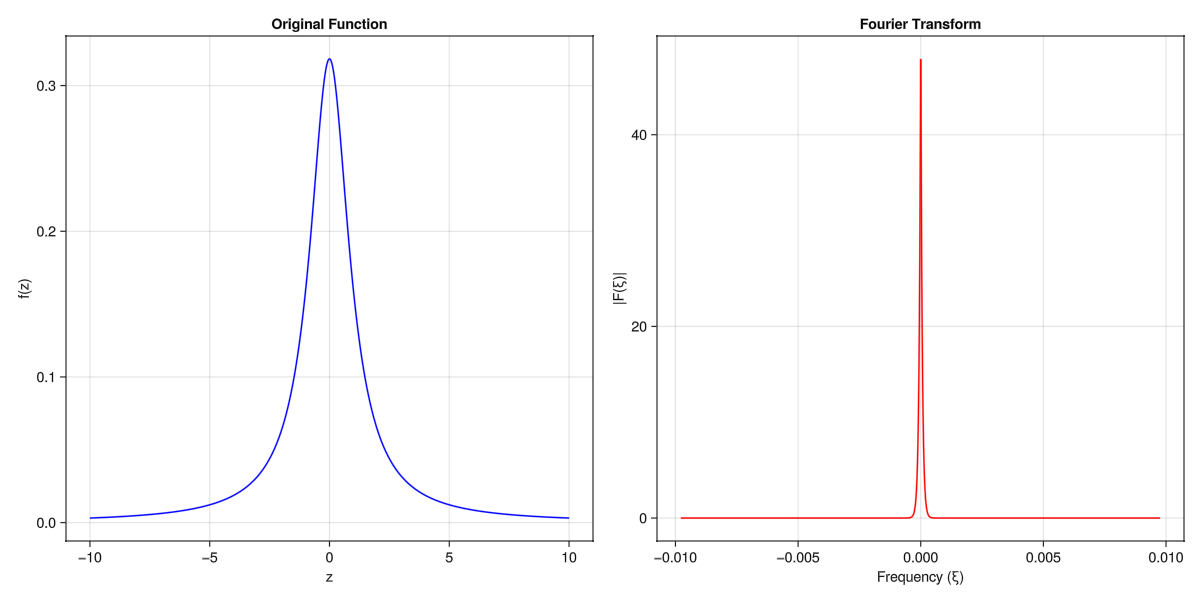

In [91]:
begin
using GLMakie
using FFTW

# Define the function
c = 1.0  # You can change this value as needed
function f(z)
    return (1 / π) * (c / (c^2 + z^2))
end

# Define the range for z and the sample points
z = LinRange(-10, 10, 1024)
f_values = f.(z)

# Compute the Fourier transform using FFT
F_transform = fftshift(fft(f_values))

# Frequency range for the Fourier transform
dz = z[2] - z[1]
N = length(z)
freq = fftshift(fftfreq(N, dz))

# Plot the original function and its Fourier transform using GLMakie
fig = Figure(size = (1200, 600))

ax1 = Axis(fig[1, 1], title = "Original Function", xlabel = "z", ylabel = "f(z)")
lines!(ax1, z, f_values, color = :blue)

ax2 = Axis(fig[1, 2], title = "Fourier Transform", xlabel = "Frequency (ξ)", ylabel = "|F(ξ)|")
lines!(ax2, freq, abs.(F_transform), color = :red)

fig[1, 1] = ax1
fig[1, 2] = ax2

    fig
end

## Action of the Fourier transform on  $\Im$

If $f$ belongs to the class $\Im_{a}\,\,\exists\, a>0$ then

$$|\hat{f}(\xi)|\le Be^{-2\pi b|\xi|}\quad \forall 0\le b <a

$\implies$ whenever $f\in\Im$ then $\hat{f}$ has rapid decay at $\infty$

If  $f\in\Im$ then the Fourier inversion holds, namely
$$\Large f(x)=\int_{-\infty}^{+\infty} \hat{f}(\xi)e^{2\pi i x\xi}\,d\xi\quad\forall x\in\mathbb{R}$$

### Poisson Summation Formula

If  $f\in\Im$ then : $\sum_{n\in\mathbb{Z}}f(n)=\sum_{n\in\mathbb{Z}}\hat{f}(n)$

$$\Huge\implies \sum_{n=-\infty}^{\infty}e^{-\pi t(n+a)^{2}}\,=\,\sum_{n=-\infty}^{\infty}t^{-1/2}e^{\pi n^{2}/t}e^{2\pi ina}$$

**for any fixed $\large t>0$ and $\large a\in\mathbb{R}$**

**Special Case**: $a=0$ is the transformation law for a version of **"theta function"**:

if we define $\vartheta$ for $t>0$ by the series $\large\vartheta(t)=\sum_{n=-\infty}^{\infty} e^{-\pi n^{2}t}$ then

$$\huge \vartheta(t)=t^{-1/2}\vartheta(1/t)\quad t>0$$


## Poley-Wiener Theorem

- **If $\large\hat{f}(\xi)=O(e^{-2\pi a|\xi|})\quad\exists a>0$ and $f$ vanishes in a non empty open interval, then $f=0$**

- **If $f$ is continuous and of moderate decrease on $\mathbb{R}$. Then $f$ has an extension to the complex plane that is entire with $\large|f(z)|\le Ae^{2\pi M |z|}\quad\exists A>0$, if and only if $\hat{f}$ is supported in the interval $[-M, M]$**

**Suppose $F$ is a holomorphic function in the sector**

$$\Large\mathcal{S}=\left\{z:\frac{-\pi}{4}<\arg z < \frac{\pi}{4}\right\}$$

that is continuous on the closure of $\mathcal{S}$. Assume $|F(z)|\le 1$ on the boundary of the sector, and that there are constants $C,c>0$ such that
$|F(z)|\le Ce^{c|z|}\quad \forall z\in\mathcal{S}$ Then
$$\huge|F(z)|\le 1 \quad \forall\,\,z\in\mathcal{S}$$ 

Note: $\arg(z)$ denotes the angle which $z$ makes with the positive real axis.

**Suppose** $f$ and $\hat{f}$ have *moderate decrease*. Then $\Large\hat{f}(\xi)=0\quad\forall\,\,\xi<0$ if and only if $f$ can be extended to a continuous and bounded function in the close upper half-plane $\left\{z=x+iy\,:\,y>0\right\}$ with $f$ holomorphic in the interior.

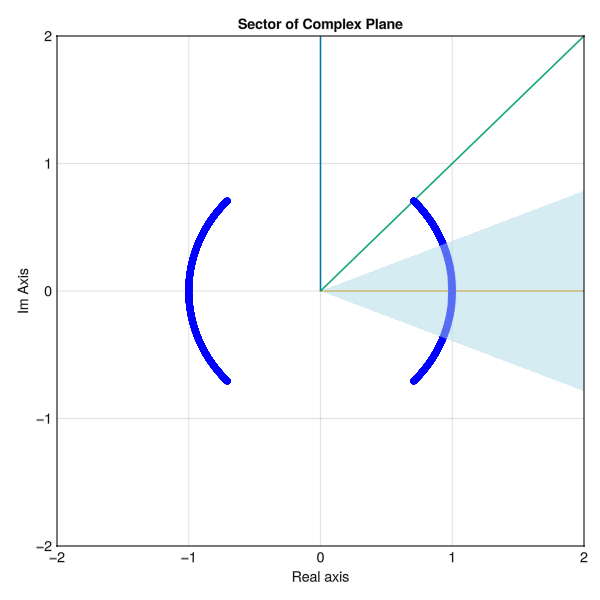

In [92]:
begin
    fig = GLMakie.Figure(size = (600, 600))
    ax = GLMakie.Axis(fig[1, 1], limits = (-2, 2, -2, 2), title = "Sector of Complex Plane",xticksvisible=false,yticksvisible=false,xlabel="Real axis",ylabel="Im Axis")

    θ = range(-π/4, π/4; length=10000)
    x = cos.(θ)
    y = sin.(θ)

    GLMakie.lines!(ax, [0, 0], [0, 2])
    GLMakie.lines!(ax, [0, 2], [0, 0])
    GLMakie.lines!(ax, [0, 2], [0, 2])
  
    GLMakie.scatter!(ax, [x; -x], [y; -y], color = :blue)
    GLMakie.poly!(ax, GLMakie.Point2f0.([(0, 0), (2, π/4), (2, -π/4)]), color = (:lightblue, 0.5))
    
    fig
end